<a href="https://colab.research.google.com/github/lovemikassa/StatPrac/blob/main/DZ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.

In [2]:
import numpy as np
from scipy import stats

def rng(m = 2**32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

samples = np.array([rng() for _ in range(1000)])
n_samples = samples.reshape(-1, 2)

k = 20
f_ob = np.histogram2d(n_samples[:, 0], n_samples[:, 1], bins = [np.linspace(0, 1, k + 1), np.linspace(0, 1, k + 1)])[0]
f_obs = f_ob.flatten()
f_exp = np.full_like(f_obs, f_obs.sum() / (k ** 2))

print(stats.chisquare(f_obs, f_exp))


Power_divergenceResult(statistic=391.2, pvalue=0.6003664860752091)


Задание 3.

In [3]:
import numpy as np
from scipy import stats
def rng_bad(m = 2**31, a = 65539, c = 0, n = 10000):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
def rng(m = 2**32, a = 1103515245, c = 12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
def test(generator, n):
    samples = [generator() for _ in range(n)]
    k = 20
    f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
    f_exp = np.full(k, len(samples) // k)
    return stats.chisquare(f_obs, f_exp)

print("rng_bad:", test(rng_bad, 10000))
print("rng:", test(rng, 10000))

rng_bad: Power_divergenceResult(statistic=15.159999999999998, pvalue=0.7123752867233677)
rng: Power_divergenceResult(statistic=12.967999999999998, pvalue=0.8402051706755415)


Задание 4.

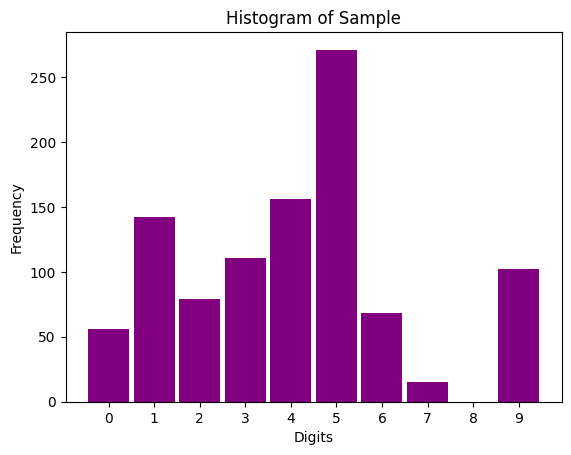

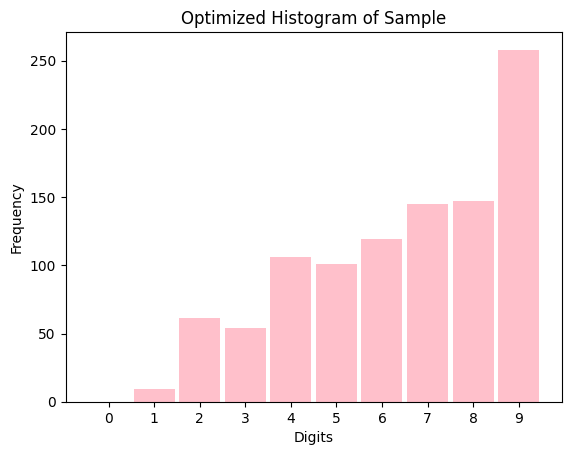

In [64]:
import numpy as np
import matplotlib.pyplot as plt
digits = np.arange(10)
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
weights = np.array(weights) / sum(weights)
n = 1000
sample = np.random.choice(digits, size = n, p = weights)

plt.hist(sample, bins = range(11), align = 'left', rwidth = 0.9, color = 'purple')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Histogram of Sample')
plt.xticks(range(10))
plt.show()

s_weights = np.array(weights)[np.argsort(weights)]
sample = np.random.choice(digits, size = n, p = s_weights)

plt.hist(sample, bins = range(11), align = 'left', rwidth = 0.9, color = 'pink')
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Optimized Histogram of Sample')
plt.xticks(range(10))
plt.show()

Задание 5.

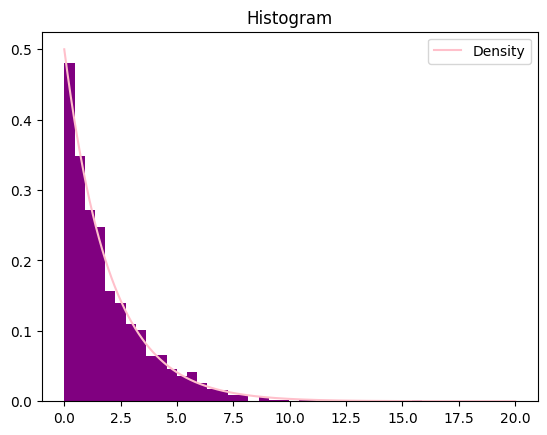

In [61]:
lambdaa = 0.5

uniform_samples = np.random.rand(1000)

exponential_samples = -np.log(1 - uniform_samples) / lambdaa

plt.hist(exponential_samples, bins = 35, density = True, color = 'purple')

x = np.linspace(0, 20, 1000)
y = lambdaa * np.exp(-lambdaa * x)
plt.plot(x, y, color = 'pink', label = 'Density')
plt.title('Histogram')
plt.legend()
plt.show()

Задание 6.

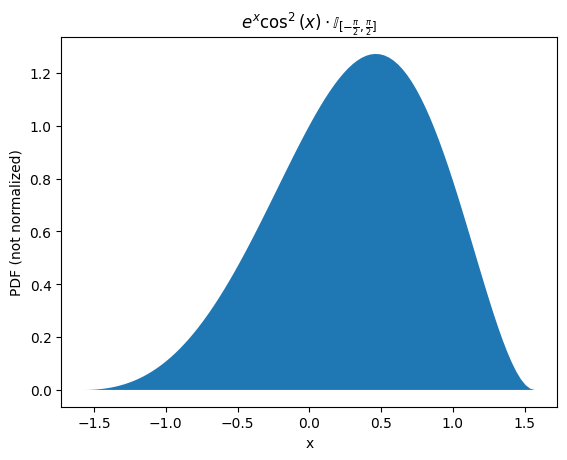

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x)**2
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')
plt.show()

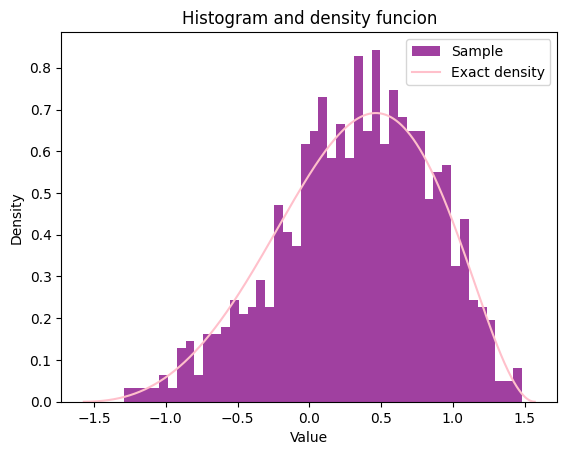

In [33]:
samples = []
for _ in range(1000):
    x = np.random.uniform(-np.pi/2, np.pi/2)
    while np.exp(x) * np.cos(x)**2 < np.random.uniform(0, 1.5):
        x = np.random.uniform(-np.pi/2, np.pi/2)
    samples.append(x)

plt.hist(samples, bins = 45, density = True, color = 'purple', alpha = 0.75, label = 'Sample')

x_val = np.linspace(-np.pi/2, np.pi/2, 1000)
dens = lambda x: np.exp(x) * np.cos(x)**2

dx = (np.pi/2 - (-np.pi/2)) / 1000
normconst = np.sum(dens(x_val) * dx)
fdens = lambda x: dens(x) / normconst

plt.plot(x_val, fdens(x_val), color = 'pink', label = 'Exact density')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and density funcion')
plt.legend()
plt.show()

Задание 7.

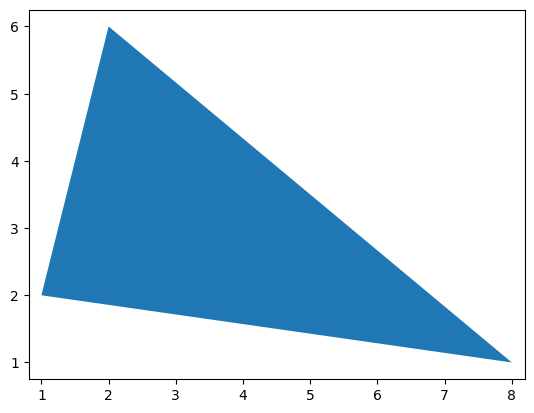

In [37]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy = np.array([[1, 2], [2, 6], [8, 1]]), closed = True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

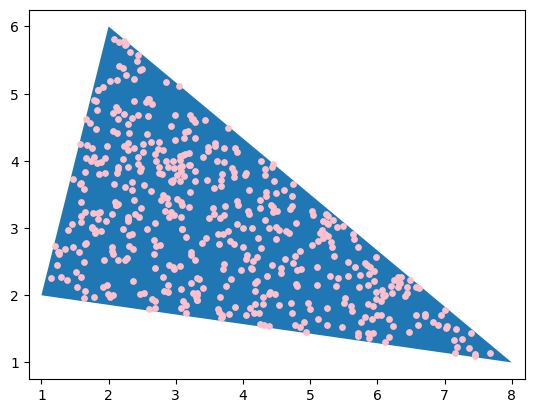

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

vertices = np.array([[1, 2], [2, 6], [8, 1]])
points = []

for _ in range(1000):
  s, t = np.random.uniform(0, 1, size = 2)

  if s + t <= 1:
    x = vertices[0, 0] + s * (vertices[1, 0] - vertices[0, 0]) + t * (vertices[2, 0] - vertices[0, 0])
    y = vertices[0, 1] + s * (vertices[1, 1] - vertices[0, 1]) + t * (vertices[2, 1] - vertices[0, 1])
    points.append([x, y])

points = np.array(points)
fig = plt.figure()
polygon = Polygon(vertices, closed = True)
plt.gca().add_collection(PatchCollection([polygon]))

plt.scatter(points[:, 0], points[:, 1], color = 'pink', s = 15)
plt.axis('equal')
plt.show()


Задание 8.

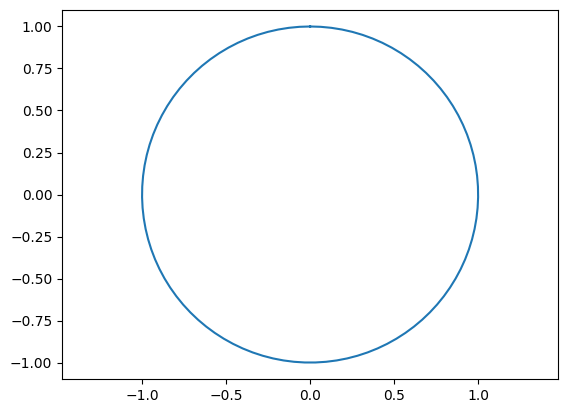

In [10]:
fig = plt.figure()

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

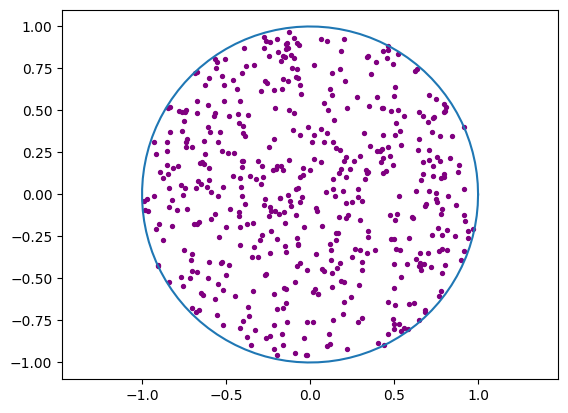

In [65]:
import numpy as np
import matplotlib.pyplot as plt

r = np.sqrt(np.random.uniform(0, 1, 500))
theta = np.random.uniform(0, 2 * np.pi, 500)

x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure()

plt.scatter(x, y, color = 'purple', s = 8)
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta))
plt.axis('equal')
plt.show()

Задание 9.

In [17]:
import seaborn as sns

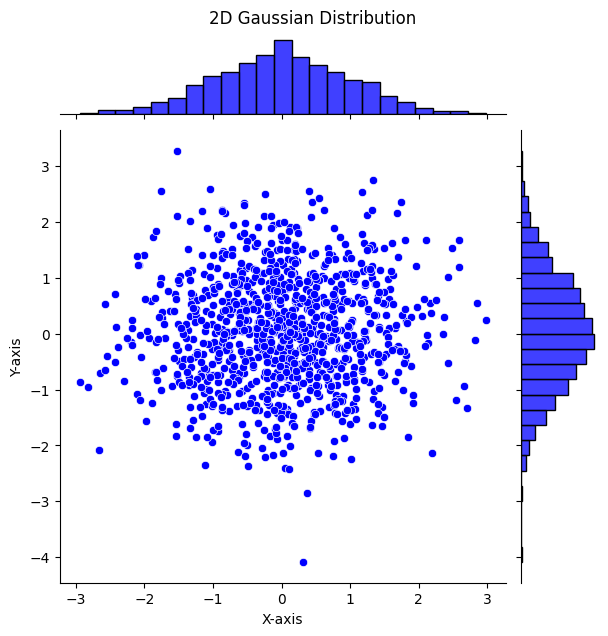

In [41]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x = x, y  =y, color = "blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y = 1.02)
plt.show()

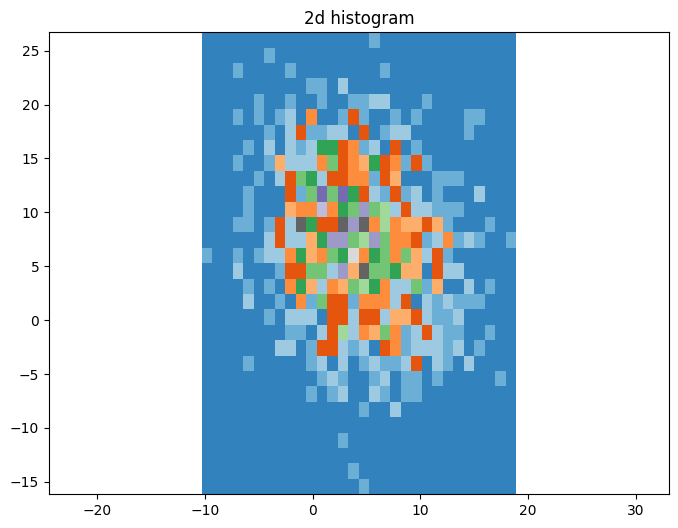

Sample mean =  [4.21346716 7.02018273] 

Covariance matrix =
 [[20.28932441 -6.16984019]
 [-6.16984019 38.17579016]]


In [60]:
u1, u2 = np.random.rand(2, 1000)
x, y = 2 * u1 - 1, 2 * u2 - 1
s = x**2 + y**2
arr = s >= 1

mean = np.array([4, 7])
covar = np.array([[20, -4], [-4, 40]])
while np.any(arr):
  u1[arr] = np.random.rand(np.sum(arr))
  u2[arr] = np.random.rand(np.sum(arr))
  x = 2 * u1 - 1
  y = 2 * u2 - 1
  s = x**2 + y**2
  arr = s >= 1

z0 = x * np.sqrt(- 2 * np.log(s) / s)
z1 = y * np.sqrt(- 2 * np.log(s) / s)
z = np.column_stack((z0, z1))

matrix = np.linalg.cholesky(covar)
res = np.dot(z, matrix) + mean
sample_mean = np.mean(res, axis = 0)
covariance = np.cov(res, rowvar = False)
plt.figure(figsize = (8, 6))
plt.hist2d(res[:, 0], res[:, 1], bins = 30, cmap = 'tab20c')
plt.axis('equal')
plt.title("2d histogram")
plt.show()

print('Sample mean = ', sample_mean, '\n\nCovariance matrix =\n', covariance)
